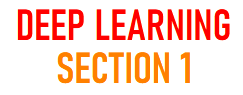

___FINAL CODE IS WRITTEN AFTER STEP 6___

___EFFICIENCY < 25 MINUTES___

___PLEASE SEE STEP 6___

__STEP 1 :__ Importing Required Packages

__Packages Imported__:
* *Requests* : To send a GET Request to the WikiHow website in order to get the html content of the webpage.

* *BeautifulSoup(bs4)* : bs4 represents BeautifulSoup4. Used to extract information obtained from the html webpage using GET Request.

* *Regex(re)* : This is a powerful module used to get, make changes and do a wide variety of tasks with information which follow a pattern in a large data with the help of regular expressions.

* *CSV* : csv module allows us to read, write and append to csv files.

* *OS* : This module allows us to do various os related operations within python. os module is imported to add the first title row to the resultant csv file thus eliminating the manual final step.

In [ ]:
import requests
import re
from bs4 import BeautifulSoup
import csv
import os

__STEP 2 :__ Adding the First Row

* os.path.exists(path) checks for the file in the specified directory and returns
       1. True if the file exists
       2. False if the file does not exist
       
       
  Here the path is the working directory of kaggle

* If the file does not exist, then the file is opened in write mode(w)

* If the file exists, then the block is not executed

* The opened file is passed as a parameter to csv.writer in order to do write operations

* Using writerow method of csv.writer, the required first row is added

In [ ]:
if not os.path.exists("/kaggle/working/wikiHow.csv"):
    with open("/kaggle/working/wikiHow.csv", 'w', encoding = 'utf-8') as file:
        csv_file = csv.writer(file)
        csv_file.writerow(["title","heading","paragraph"])

__STEP 3 :__ Getting the title of the random WikiHow article

*  _"https://www.wikihow.com/Special:Randomizer"_ - This URL generates a random url of a random article from wikihow website

* get function of requests module is used to get the response from the wikihow website.

* The response.content returns the html code of the website.



In [ ]:
url = "https://www.wikihow.com/Special:Randomizer"

response = requests.get(url)
html_content = response.content

* BeautifulSoup is used to parse the html content in order to make it easier to do other operations.

* Now We will extract the title from the html code using soup.find("title").text.strip() mentioned in the below line 
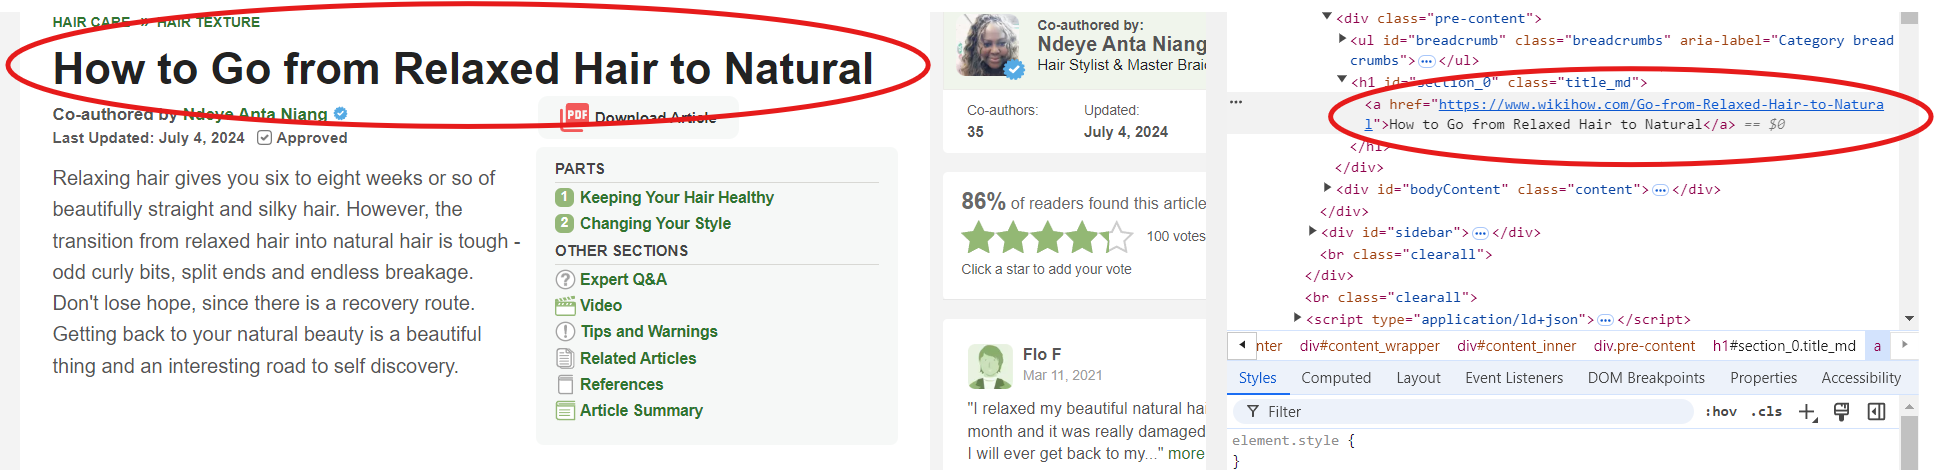

* 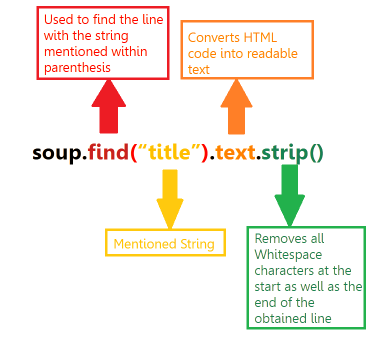

In [ ]:
soup = BeautifulSoup(html_content,"html.parser")
article_title = soup.find("title").text.strip()
#print(article_title)

__STEP 4 :__ Getting the Subheadings & Paragraphs

* In the soup.find_all() : the "div" argument selects all the lines with "div" string and the attribute argument,{"class" : "step"} selects all the div lines with class step.

* soup.find_all returns a list and it is stored in a variable called steps.

* We now iterate through each element of the steps list.

* The subheadings are bolded in wikihow so by using the 'b' tag of html, we can find the lines with the subheadings using find method.

* 1. The subheading is converted into readable text using .text
  2. Unnecessary whitespaces are removed using strip() method
  3. The new line characters are replaced by ' ' using replace() method
  4. Unneccessary text in other formats are removed by encoding the obtained string to ascii and again decoding it to readable format
  
  
* Finally,the obtained subheading is appended to the subheadings list

In [ ]:
subheadings = []
paragraphs = []
steps = soup.find_all("div",{"class":"step"})

for step in steps:
    subheading_element = step.find("b")
    if subheading_element is not None:
        subheading_text = subheading_element.text.strip().replace('\n','')
        subheading_text = subheading_text.encode("ascii",errors='ignore').decode();
        subheading_text = re.sub(r'','',subheading_text)
        subheadings.append(subheading_text)
        #print(subheading_text)
        
        
        #This block removes unneccessary links and titles
        subheading_element.extract()
        for span_tag in step.find_all('span'):
            span_tag.extract()
            
        #Now We repeat the same procedure to get paragraph from the content
        paragraph_text = step.text.strip().replace('\n','').replace(' ',' ')
        paragraph_text = paragraph_text.encode("ascii",errors='ignore').decode();
        paragraph_text = re.sub(r'','',paragraph_text)
        paragraphs.append(paragraph_text)
        #print(paragraphs)

__STEP 5 :__ The obtained data is written to the csv file in the below block of code

In [ ]:
if(len(subheadings)):
    with open("/kaggle/working/wikiHow.csv", mode = 'a', newline='', encoding = 'utf-8') as file:
        writer = csv.writer(file)
        for i in range(len(subheadings)):
            writer.writerow([article_title,subheadings[i],paragraphs[i]])
        writer.writerow(['\n']) # for seperation between articles

__STEP 6 :__ Final Step

* Running this entire code 4000 times is very demanding especially the file opening operation is very demanding because of I/O operations.

* As a solution, we will first execute the code 4000 times then write the data to the csv file.

* By this method, The file need not be opened in each iteration thus decreasing the overall load.

In [1]:
import requests
import re
from bs4 import BeautifulSoup
import csv
import os

total_titles = []
total_subheadings = []
total_paragraphs = []

url = "https://www.wikihow.com/Special:Randomizer"
#responses = []
#for count in range(1):
#    response = requests.get(url)
#    responses.append(response)
#    print(response)
    
if not os.path.exists("/kaggle/working/wikiHow.csv"):
    with open("/kaggle/working/wikiHow.csv", 'w', encoding = 'utf-8') as file:
        csv_file = csv.writer(file)
        csv_file.writerow(["title","heading","paragraph"])
        
for count in range(4000):
    response = requests.get(url)
    html_content = response.content
    
    soup = BeautifulSoup(html_content,"html.parser")
    article_title = soup.find("title").text.strip()
    
    subheadings = []
    paragraphs = []
    steps = soup.find_all("div",{"class":"step"})

    for step in steps:
        subheading_element = step.find("b")
        if subheading_element is not None:
            subheading_text = subheading_element.text.strip().replace('\n','')
            subheading_text = subheading_text.encode("ascii",errors='ignore').decode();
            subheading_text = re.sub(r'','',subheading_text)
            subheadings.append(subheading_text)
            #print(subheading_text)


            #This block removes unneccessary links and titles
            subheading_element.extract()
            for span_tag in step.find_all('span'):
                span_tag.extract()

            #Now We repeat the same procedure to get paragraph from the content
            paragraph_text = step.text.strip().replace('\n','').replace(' ',' ')
            paragraph_text = paragraph_text.encode("ascii",errors='ignore').decode();
            paragraph_text = re.sub(r'','',paragraph_text)
            paragraphs.append(paragraph_text)
            #print(paragraphs)
    
    #The obtained data is temporarily stored in lists
    total_titles.append(article_title)
    total_subheadings.append(subheadings)
    total_paragraphs.append(paragraphs)
        
#As seen here the csv file is opened after the execution of the for loop
f = open("/kaggle/working/wikiHow.csv", mode = 'a', newline = '', encoding = 'utf-8')
writer = csv.writer(f)
for i in range(len(total_titles)):
    #The data is obtained from the temporary lists
    article_title = total_titles[i]
    subheadings = total_subheadings[i]
    paragraphs = total_paragraphs[i]
    if(len(subheadings)):
        for i in range(len(subheadings)):
            writer.writerow([article_title,subheadings[i],paragraphs[i]])
        writer.writerow(['\n']) # for seperation between articles
        
f.close()
        
print("Success!")

KeyboardInterrupt: 